#  Construction in Ireland: Cement Data 

CA2 (26/05/2023) - MSc in Data Analytics 
<b>Student ID: 2023063

### Introduction 
write briefing

### Data Preparation and Visualisation

In [28]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') # To suppress the warnings
%matplotlib inline 

In [29]:
# Read cement data (csv)

cement_data = pd.read_csv("cementdata.csv")

In [30]:
cement_data.head()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
0,Consumption Volume,Thousand tons,3563.00,3489.00,1748.00,1704.00,1263.00,48.40,856.00,580.90,667.00,Ireland,Cement
1,Consumption Value,Million USD,264.30,267.40,159.10,160.80,137.10,7.70,101.40,69.20,83.40,Ireland,Cement
2,Production Volume,Thousand tons,4003.00,3900.00,2600.00,2600.00,2103.00,1198.00,2000.00,2000.00,2500.00,Ireland,Cement
3,Production Value,Million USD,146.70,160.20,175.10,191.30,209.00,228.40,234.90,237.60,323.70,Ireland,Cement
4,Import Volume,Thousand tons,684.40,735.40,204.10,138.70,104.30,90.70,92.30,106.70,89.80,Ireland,Cement


In [31]:
cement_data.tail()

,FACTOR,UNITS,2007,2008,2009,2010,2011,2012,2013,2014,2015,Country,Product
125,Import Price,USD per Ton,81.5,97.6,225.8,343,773.8,189.3,330.6,225.8,275.3,Iran,Cement
126,Export Price,USD per Ton,91.9,97.2,76.4,76.5,62.5,62.5,59.6,74.5,59.7,Iran,Cement
127,Per Capita Consumption,Kg per Person,569,608.9,670,653.2,861.6,902.8,862.3,800.3,626.9,Iran,Cement
128,Net Export Volume,Thousand tons,11.1,43.8,631.5,1291,956.9,1227,1927,3951,8851,Iran,Cement
129,Net Export Value,Million USD,1.7,4.2,46.9,96.7,53.4,72.7,103.7,286.9,522,Iran,Cement


In [32]:
# Number of countries

cement_data["Country"].nunique()

10

In [33]:
# Country names 

cement_data["Country"].unique()

array(['Ireland', 'USA', 'Brazil', 'China', 'Germany', 'Russia',
       'Australia', 'Vietnam', 'Japan', 'Iran'], dtype=object)

In [34]:
# Define function to split data by country

def cement_df(country, new_df, original_df):
    new_df = original_df[original_df["Country"]==country]
    new_df = new_df.drop({"Country","Product","UNITS"}, axis='columns')
    new_df = new_df.transpose()
    new_df.columns = new_df.iloc[0]
    new_df.drop(index=new_df.index[0], axis=0, inplace=True)
    new_df.reset_index(inplace=True)
    new_df.rename(columns= {"index":"Year"},inplace=True)
    return new_df

In [35]:
# Ireland cement data

ireland_cement = cement_df(country="Ireland", new_df="ireland_cement", original_df=cement_data)
ireland_cement["Code"] = "IRL"
ireland_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.00,264.30,4003.00,146.70,684.40,65.50,1124.00,105.50,95.70,93.90,810.10,439.60,40.00,IRL
1,2008,3489.00,267.40,3900.00,160.20,735.40,65.40,1146.00,112.00,88.90,97.70,777.20,410.80,46.60,IRL
2,2009,1748.00,159.10,2600.00,175.10,204.10,23.00,1056.00,101.90,112.60,96.50,382.60,852.00,78.90,IRL
3,2010,1704.00,160.80,2600.00,191.30,138.70,13.90,1035.00,104.70,99.90,101.20,368.20,896.50,90.90,IRL
4,2011,1263.00,137.10,2103.00,209.00,104.30,10.90,944.60,94.00,104.60,99.50,270.80,840.30,83.10,IRL
5,2012,48.40,7.70,1198.00,228.40,90.70,10.70,1240.00,111.20,118.50,89.60,10.40,1150.00,100.40,IRL
6,2013,856.00,101.40,2000.00,234.90,92.30,10.00,1236.00,110.60,107.80,89.50,182.80,1144.00,100.60,IRL
7,2014,580.90,69.20,2000.00,237.60,106.70,9.50,1526.00,148.00,88.90,97.00,124.00,1419.00,138.50,IRL
8,2015,667.00,83.40,2500.00,323.70,89.80,7.00,1923.00,145.40,78.10,75.60,141.90,1833.00,138.40,IRL


In [36]:
# United States cement data

usa_cement = cement_df(country="USA", new_df="usa_cement", original_df=cement_data)
usa_cement["Code"] = "USA"
usa_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,117546.00,12055.00,96850.00,10153.00,21739.00,1693.00,1042.00,131.40,77.90,126.00,391.00,-20696.30,-1561.20,USA
1,2008,97539.00,9737.00,87610.00,8915.00,10898.00,949.10,969.60,117.50,87.10,121.20,321.50,﻿-9928.3,﻿-831.6,USA
2,2009,70200.00,6020.00,64843.00,5568.00,6338.00,561.40,980.20,117.50,88.60,119.90,229.40,﻿-5357.6,﻿-443.9,USA
3,2010,71960.00,5503.00,67176.00,5064.00,6141.00,535.80,1357.00,184.30,87.30,135.80,233.10,﻿-4783.6,﻿-351.5,USA
4,2011,72929.00,5674.00,68639.00,5278.00,5937.00,519.00,1646.00,211.30,87.40,128.30,234.50,﻿-4290.3,﻿-307.8,USA
5,2012,79217.00,6069.00,74934.00,5661.00,6276.00,552.70,1993.00,259.10,88.10,130.00,252.80,﻿-4283,﻿-293.6,USA
6,2013,82025.00,6901.00,77415.00,6506.00,6514.00,571.90,1904.00,257.70,87.80,135.40,260.00,﻿-4610,﻿-314.2,USA
7,2014,86346.00,7237.00,83124.00,6956.00,6069.00,663.10,2847.00,264.20,109.30,92.80,271.80,﻿-3222,﻿-398.9,USA
8,2015,101975.00,8547.00,93208.00,7800.00,10337.00,896.10,1571.00,240.10,86.70,152.90,318.70,﻿-8766.6,﻿-656,USA


In [37]:
# Brazil cement data

brazil_cement = cement_df(country="Brazil", new_df="brazil_cement", original_df=cement_data)
brazil_cement["Code"] = "BRA"
brazil_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,45592.00,3981.00,46551.00,3802.00,286.60,20.80,1246.00,62.30,72.50,50.00,238.70,959.20,41.50,BRA
1,2008,51654.00,5397.00,51970.00,5478.00,286.60,26.80,602.80,39.30,93.30,65.20,267.70,316.10,12.50,BRA
2,2009,52095.00,5174.00,51748.00,5086.00,397.00,39.40,49.60,5.10,99.30,102.90,267.30,﻿-347.4,﻿-34.3,BRA
3,2010,59937.00,6616.00,59118.00,6714.00,859.70,79.40,40.50,4.50,92.30,112.00,304.60,﻿-819.2,﻿-74 8,BRA
4,2011,65145.00,7906.00,64093.00,8250.00,1098.00,99.50,45.40,5.40,90.60,118.90,327.90,﻿-1052.3,-94.10,BRA
5,2012,70275.00,7580.00,69323.00,7631.00,985.60,92.10,33.50,4.40,93.40,131.20,350.40,﻿-952.1,﻿-87.7,BRA
6,2013,70976.00,7647.00,69975.00,7690.00,1034.00,92.90,32.70,4.20,89.80,129.30,350.70,﻿-1001.2,﻿-88.6,BRA
7,2014,72034.00,7739.00,71254.00,7801.00,823.90,77.00,43.70,5.50,93.40,126.50,352.70,﻿-780.2,﻿-71.4,BRA
8,2015,65649.00,5437.00,65283.00,4927.00,514.10,48.70,147.90,13.00,94.80,87.80,318.70,﻿-366.2,-35.70,BRA


In [38]:
# China cement data

china_cement = cement_df(country="China", new_df="china_cement", original_df=cement_data)
china_cement["Code"] = "CHN"
china_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,1346507.00,58994.00,1361170.00,54201.00,532.40,22.40,15195.00,605.10,42.10,39.80,985.00,14663.00,582.60,CHN
1,2008,1387333.00,69244.00,1400000.00,66718.00,565.30,27.10,13232.00,630.60,47.90,47.70,1009.00,12667.00,603.50,CHN
2,2009,1636216.00,84842.00,1644000.00,82445.00,702.70,33.40,8487.00,425.60,47.50,50.10,1183.00,7784.00,392.20,CHN
3,2010,1870996.00,97491.00,1880000.00,94894.00,823.10,38.80,9827.00,496.00,47.20,50.50,1346.00,9004.00,457.20,CHN
4,2011,2091058.00,124781.00,2099000.00,126356.00,855.60,45.30,8798.00,529.60,52.90,60.20,1495.00,7943.00,484.40,CHN
5,2012,2201410.00,132310.00,2210000.00,134256.00,649.90,37.70,9240.00,561.30,57.90,60.70,1566.00,8590.00,523.70,CHN
6,2013,2400469.00,139494.00,2411000.00,140297.00,411.20,26.90,10942.00,636.70,65.30,58.20,1698.00,10531.00,609.90,CHN
7,2014,2482064.00,147064.00,2492000.00,148660.00,238.10,21.40,10174.00,606.90,89.80,59.70,1746.00,9936.00,585.50,CHN
8,2015,2349902.00,136241.00,2359000.00,136866.00,103.60,16.80,9202.00,533.90,162.30,58.00,1645.00,9098.00,517.10,CHN


In [39]:
# Germany cement data

germany_cement = cement_df(country="Germany", new_df="germany_cement", original_df=cement_data)
germany_cement["Code"] = "DEU"
germany_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,27566.00,2198.00,33382.00,2644.00,1144.00,160.90,6961.00,599.70,140.60,86.20,338.90,5816.00,438.80,DEU
1,2008,27452.00,2193.00,33581.00,2665.00,1064.00,173.20,7193.00,750.10,162.80,104.30,338.40,6129.00,576.90,DEU
2,2009,24918.00,2188.00,30441.00,2687.00,1025.00,159.60,6548.00,643.70,155.70,98.30,307.80,5523.00,484.00,DEU
3,2010,24756.00,2059.00,29894.00,2483.00,1046.00,166.20,6184.00,570.00,158.80,92.20,306.00,5138.00,403.80,DEU
4,2011,26766.00,2410.00,32779.00,2975.00,1117.00,184.30,7131.00,709.90,164.90,99.60,330.70,6014.00,525.60,DEU
5,2012,27169.00,2234.00,32432.00,2660.00,1277.00,181.10,6541.00,615.50,141.80,94.10,335.10,5263.00,434.30,DEU
6,2013,26602.00,2295.00,31308.00,2709.00,1344.00,203.50,6050.00,588.80,151.40,97.30,327.40,4706.00,385.30,DEU
7,2014,27677.00,2420.00,32099.00,2820.00,1325.00,208.80,5747.00,558.10,157.60,97.10,339.60,4422.00,349.30,DEU
8,2015,26207.00,1980.00,31160.00,2322.00,1308.00,177.20,6262.00,498.00,135.40,79.50,320.70,4953.00,320.80,DEU


In [40]:
# Russia cement data

russia_cement = cement_df(country="Russia", new_df="russia_cement", original_df=cement_data)
russia_cement["Code"] = "RUS"
russia_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,60349.00,5694.00,59939.00,6146.00,2066.00,206.60,1656.00,169.80,100.00,102.50,421.60,﻿-409.6,﻿-36.8,RUS
1,2008,58928.00,7027.00,53548.00,7563.00,5862.00,593.10,482.00,68.10,101.20,141.20,411.80,﻿-5380,﻿-525,RUS
2,2009,44046.00,3703.00,44266.00,3832.00,1124.00,88.60,1344.00,116.30,78.90,86.60,307.80,220.00,27.70,RUS
3,2010,50862.00,4133.00,50392.00,4142.00,1170.00,91.00,700.20,57.60,77.80,82.20,355.30,﻿-469.4,﻿-33.4,RUS
4,2011,58164.00,5168.00,56153.00,5279.00,2398.00,212.50,386.90,36.40,88.60,94.00,406.00,-2011.50,-176.10,RUS
5,2012,64461.00,6155.00,61691.00,6434.00,4234.00,348.40,1464.00,152.70,82.30,104.30,449.50,-2770.20,-195.70,RUS
6,2013,69128.00,6639.00,66549.00,6999.00,4338.00,347.30,1759.00,185.00,80.10,105.20,481.40,-2578.80,-162.30,RUS
7,2014,71772.00,5875.00,69139.00,5748.00,4501.00,337.90,1868.00,155.30,75.10,83.10,499.20,-2633.00,-182.60,RUS
8,2015,63262.00,3948.00,62103.00,3286.00,2883.00,169.20,1723.00,91.20,58.70,52.90,439.70,-1159.70,-78.00,RUS


In [41]:
# Australia cement data

australia_cement = cement_df(country="Australia", new_df="australia_cement", original_df=cement_data)
australia_cement["Code"] = "AUS"
australia_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,9485.00,2604.00,9200.00,2333.00,306.60,38.20,21.90,5.60,124.70,253.60,452.80,-284.70,-32.70,AUS
1,2008,10086.00,3181.00,9400.00,3041.00,705.80,77.30,20.10,6.50,109.60,323.50,472.60,﻿-685.6,﻿-70.8,AUS
2,2009,9615.00,2947.00,9200.00,2836.00,431.50,46.20,16.60,5.10,107.10,308.30,442.30,﻿-414 9,﻿-41.1,AUS
3,2010,9415.00,2986.00,9000.00,2940.00,442.40,51.60,27.30,8.90,116.70,326.60,425.60,﻿-415,﻿-42.7,AUS
4,2011,9106.00,3268.00,8600.00,3423.00,530.50,45.60,24.60,9.80,85.90,398.00,405.10,﻿-505.9,﻿-35.8,AUS
5,2012,9109.00,2954.00,8500.00,2879.00,629.00,51.20,20.60,7.00,81.40,338.80,399.10,﻿-608.5,﻿-44.2,AUS
6,2013,8810.00,2726.00,8400.00,2631.00,423.80,40.30,13.70,4.30,95.00,313.30,380.60,﻿-410.1,﻿-36,AUS
7,2014,9376.00,3648.00,9000.00,4047.00,383.20,40.70,71.00,3.20,106.30,449.60,399.40,﻿-376.1,﻿-37.6,AUS
8,2015,9395.00,2713.00,9100.00,2530.00,303.10,31.60,8.50,2.40,104.20,278.00,394.70,﻿-294.6,﻿-29.2,AUS


In [42]:
# Vietnam cement data

vietnam_cement = cement_df(country="Vietnam", new_df="vietnam_cement", original_df=cement_data)
vietnam_cement["Code"] = "VNM"
vietnam_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,37076.00,3976.00,37102.00,4297.00,63.50,7.30,89.40,10.40,115.20,115.80,431.70,25.90,3.00,VNM
1,2008,40032.00,3958.00,40009.00,4209.00,115.40,12.20,92.70,9.70,105.80,105.20,461.70,﻿-22.7,﻿-2.5,VNM
2,2009,47930.00,4389.00,47900.00,4596.00,123.50,15.60,94.00,9.00,126.60,95.90,547.40,﻿-29.5,﻿-6.6,VNM
3,2010,55599.00,4804.00,55801.00,4987.00,92.60,11.50,294.50,26.30,124.30,89.40,628.40,201.90,14.80,VNM
4,2011,57914.00,4816.00,58271.00,4967.00,73.60,9.90,430.40,36.70,135.10,85.20,647.50,356.80,26.70,VNM
5,2012,55187.00,3663.00,56353.00,3603.00,52.00,5.60,1218.00,77.90,107.90,63.90,610.10,1166.00,72.30,VNM
6,2013,54111.00,4205.00,57516.00,4505.00,31.40,4.00,3437.00,269.20,125.90,78.30,591.40,3405.00,265.20,VNM
7,2014,57183.00,4356.00,60982.00,4658.00,34.40,6.50,3834.00,292.80,188.50,76.40,617.90,3799.00,286.30,VNM
8,2015,64521.00,5004.00,67427.00,5269.00,36.50,5.20,2942.00,229.90,141.90,78.10,689.50,2906.00,224.70,VNM


In [43]:
# Japan cement data

japan_cement = cement_df(country="Japan", new_df="japan_cement", original_df=cement_data)
japan_cement["Code"] = "JPN"
japan_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,58919,160.5,63705,138.6,1154,61.8,5940,174.4,53.6,29.4,458.5,4786,112.6,JPN
1,2008,57460,180.1,62810,170,935.4,61.5,6285,204.7,65.8,32.6,447,5350,143.2,JPN
2,2009,49529,184.9,54800,190.9,827.2,62.2,6099,215.9,75.2,35.4,385.2,5271,153.7,JPN
3,2010,46756,191.6,51526,203.8,628.9,56.5,5399,175.8,89.8,32.6,363.7,4770,119.3,JPN
4,2011,47096,244.9,51291,276.3,729.4,70.1,4924,165.7,96.1,33.7,366.5,4195,95.6,JPN
5,2012,50175,250.7,54737,280.4,846.4,79.1,5409,203.1,93.4,37.5,390.7,4562,124,JPN
6,2013,53572,229.6,57962,243.5,828,68.8,5218,203.7,83,39,417.5,4390,134.9,JPN
7,2014,53284,229.2,57913,244.4,609,56.1,5238,214.8,92.2,41,415.8,4629,158.6,JPN
8,2015,49441,214.1,54827,233.5,393.7,39.8,5779,235.8,101.1,40.8,386.3,5386,196,JPN


In [44]:
# Iran cement data

iran_cement = cement_df(country="Iran", new_df="iran_cement", original_df=cement_data)
iran_cement["Code"] = "IRN"
iran_cement

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,40989,2185,41000,1588,64.2,5.2,75.3,6.9,81.5,91.9,569,11.1,1.7,IRN
1,2008,44356,2775,44400,2233,37.6,3.7,81.4,7.9,97.6,97.2,608.9,43.8,4.2,IRN
2,2009,49369,3124,50000,2559,9,2,640.5,49,225.8,76.4,670,631.5,46.9,IRN
3,2010,48709,3337,50000,2885,7.8,2.7,1298,99.4,343,76.5,653.2,1291,96.7,IRN
4,2011,65043,4129,66000,3394,9,7,965.9,60.4,773.8,62.5,861.6,956.9,53.4,IRN
5,2012,69023,4610,70250,3903,31.7,6,1258,78.7,189.3,62.5,902.8,1227,72.7,IRN
6,2013,66773,4984,68700,4489,41.1,13.6,1968,117.2,330.6,59.6,862.3,1927,103.7,IRN
7,2014,62749,5290,66700,5162,47.9,10.8,3999,297.8,225.8,74.5,800.3,3951,286.9,IRN
8,2015,49749,5148,58600,5936,31.2,8.6,8883,530.6,275.3,59.7,626.9,8851,522,IRN


### Plotting charts

In [45]:
# Merge data

cement_merge = pd.merge(ireland_cement,usa_cement, how="outer")
cement_merge = pd.merge(cement_merge,brazil_cement, how="outer")
cement_merge = pd.merge(cement_merge,china_cement, how="outer")
cement_merge = pd.merge(cement_merge,germany_cement, how="outer")
cement_merge = pd.merge(cement_merge,russia_cement, how="outer")
cement_merge = pd.merge(cement_merge,australia_cement, how="outer")
cement_merge = pd.merge(cement_merge,vietnam_cement, how="outer")
cement_merge = pd.merge(cement_merge,japan_cement, how="outer")
cement_merge = pd.merge(cement_merge,iran_cement, how="outer")

cement_merge.head(10)

FACTOR,Year,Consumption Volume,Consumption Value,Production Volume,Production Value,Import Volume,Import Value,Export Volume,Export Value,Import Price,Export Price,Per Capita Consumption,Net Export Volume,Net Export Value,Code
0,2007,3563.00,264.30,4003.00,146.70,684.40,65.50,1124.00,105.50,95.70,93.90,810.10,439.60,40.00,IRL
1,2008,3489.00,267.40,3900.00,160.20,735.40,65.40,1146.00,112.00,88.90,97.70,777.20,410.80,46.60,IRL
2,2009,1748.00,159.10,2600.00,175.10,204.10,23.00,1056.00,101.90,112.60,96.50,382.60,852.00,78.90,IRL
3,2010,1704.00,160.80,2600.00,191.30,138.70,13.90,1035.00,104.70,99.90,101.20,368.20,896.50,90.90,IRL
4,2011,1263.00,137.10,2103.00,209.00,104.30,10.90,944.60,94.00,104.60,99.50,270.80,840.30,83.10,IRL
5,2012,48.40,7.70,1198.00,228.40,90.70,10.70,1240.00,111.20,118.50,89.60,10.40,1150.00,100.40,IRL
6,2013,856.00,101.40,2000.00,234.90,92.30,10.00,1236.00,110.60,107.80,89.50,182.80,1144.00,100.60,IRL
7,2014,580.90,69.20,2000.00,237.60,106.70,9.50,1526.00,148.00,88.90,97.00,124.00,1419.00,138.50,IRL
8,2015,667.00,83.40,2500.00,323.70,89.80,7.00,1923.00,145.40,78.10,75.60,141.90,1833.00,138.40,IRL
9,2007,117546.00,12055.00,96850.00,10153.00,21739.00,1693.00,1042.00,131.40,77.90,126.00,391.00,-20696.30,-1561.20,USA


In [83]:
cement_merge["Year"] = pd.to_numeric(cement_merge["Year"])
cement_merge["Consumption Volume"] = pd.to_numeric(cement_merge["Consumption Volume"])
cement_merge["Consumption Value"] = pd.to_numeric(cement_merge["Consumption Value"])
cement_merge["Production Volume"] = pd.to_numeric(cement_merge["Production Volume"])
cement_merge["Production Value"] = pd.to_numeric(cement_merge["Production Value"])
cement_merge["Import Volume"] = pd.to_numeric(cement_merge["Import Volume"])
cement_merge["Import Value"] = pd.to_numeric(cement_merge["Import Value"])
cement_merge["Export Volume"] = pd.to_numeric(cement_merge["Export Volume"])
cement_merge["Import Price"] = pd.to_numeric(cement_merge["Import Price"])
cement_merge["Export Price"] = pd.to_numeric(cement_merge["Export Price"])
cement_merge["Per Capita Consumption"] = pd.to_numeric(cement_merge["Per Capita Consumption"])

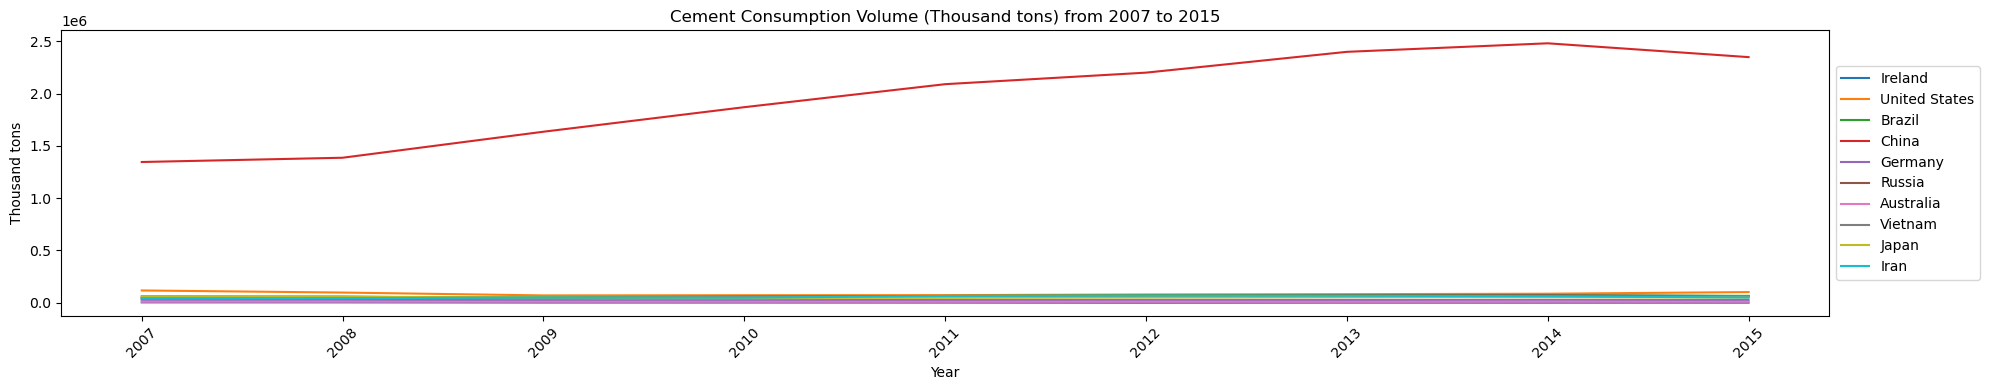

In [75]:
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

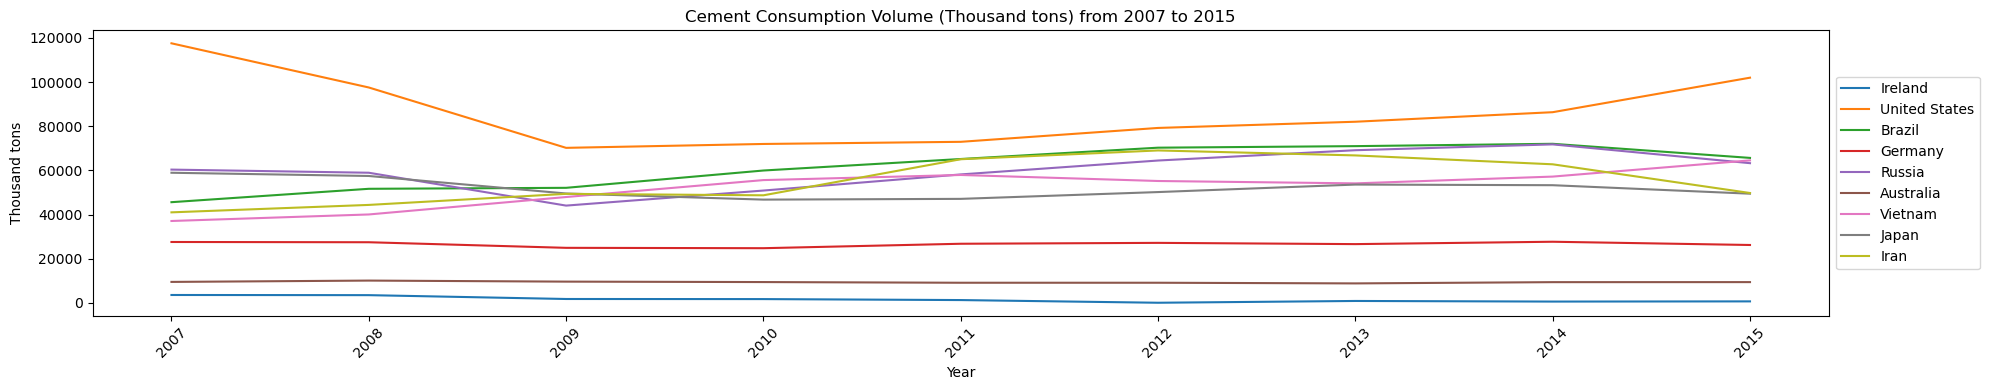

In [74]:
# Create figure and set of subplots
fig, ax = plt.subplots()

ax.plot(cement_merge[cement_merge["Code"]=="IRL"]["Year"], cement_merge[cement_merge["Code"]=="IRL"]["Consumption Volume"], label="Ireland")
ax.plot(cement_merge[cement_merge["Code"]=="USA"]["Year"], cement_merge[cement_merge["Code"]=="USA"]["Consumption Volume"], label="United States")
ax.plot(cement_merge[cement_merge["Code"]=="BRA"]["Year"], cement_merge[cement_merge["Code"]=="BRA"]["Consumption Volume"], label="Brazil")
#ax.plot(cement_merge[cement_merge["Code"]=="CHN"]["Year"], cement_merge[cement_merge["Code"]=="CHN"]["Consumption Volume"], label="China")
ax.plot(cement_merge[cement_merge["Code"]=="DEU"]["Year"], cement_merge[cement_merge["Code"]=="DEU"]["Consumption Volume"], label="Germany")
ax.plot(cement_merge[cement_merge["Code"]=="RUS"]["Year"], cement_merge[cement_merge["Code"]=="RUS"]["Consumption Volume"], label="Russia")
ax.plot(cement_merge[cement_merge["Code"]=="AUS"]["Year"], cement_merge[cement_merge["Code"]=="AUS"]["Consumption Volume"], label="Australia")
ax.plot(cement_merge[cement_merge["Code"]=="VNM"]["Year"], cement_merge[cement_merge["Code"]=="VNM"]["Consumption Volume"], label="Vietnam")
ax.plot(cement_merge[cement_merge["Code"]=="JPN"]["Year"], cement_merge[cement_merge["Code"]=="JPN"]["Consumption Volume"], label="Japan")
ax.plot(cement_merge[cement_merge["Code"]=="IRN"]["Year"], cement_merge[cement_merge["Code"]=="IRN"]["Consumption Volume"], label="Iran")


# Config graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Cement Consumption Volume (Thousand tons) from 2007 to 2015")
plt.xlabel("Year")
plt.ylabel("Thousand tons")
plt.xticks(rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display graphic
plt.show()

In [48]:
def get_column(name,column_filter,column_query,origin_df):
    new_data = origin_df[origin_df[column_filter]==name][column_query]
    return new_data

In [49]:
yearireland = get_column("IRL","Code","Year",cement_merge)
yearireland

0    2007
1    2008
2    2009
3    2010
4    2011
5    2012
6    2013
7    2014
8    2015
Name: Year, dtype: int64

In [50]:
country = get_column("IRL","Code","Code",cement_merge)
country

0    IRL
1    IRL
2    IRL
3    IRL
4    IRL
5    IRL
6    IRL
7    IRL
8    IRL
Name: Code, dtype: object

In [79]:
fig = px.choropleth(cement_merge, locations="Code",
                    color="Production Value", 
                    hover_name="Code", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=[[0, 'rgb(240,240,240)'],
                      [0.10, 'rgb(252, 244, 83)'],
                      [0.2, 'rgb(255, 145, 36)'],
                      [0.50, 'rgb(255, 85, 28)'],
                      [1, 'rgb(227,26,28,0.5)']])
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Production Value (Million USD)',
    # set projection style for the plot
    geo = dict(projection={'type':'natural earth'}) 
    # by default, projection type is set to 'equirectangular'
)
fig.show()


In [73]:
fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Per Capita Consumption", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Per Capita Consumption (kg/person)',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()


In [84]:
fig = px.scatter_geo(cement_merge, 
                    locations="Code", 
                     # name of column which contains state codes
                    size="Import Price", 
                     # name of column which contains aggregate value to visualize
                    hover_name="Code",
                    size_max=40,
                    animation_frame="Year",)
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Cement Production Value',
    # limit plot scope to USA
    geo = dict(projection={'type':'natural earth'})
)
fig.show()
